In [2]:
from dl import authClient as ac, queryClient as qc, storeClient as sc, helpers
import pylab as plt
import numpy as np

In [3]:
token=ac.login('mgkadrmas')

In [4]:
def LMCParallax (ra,dec,radius):
    #take query
    res=qc.query(token,sql='select * from gaia_dr2.gaia_source where q3c_radial_query(ra,dec,'+str(ra)+','+str(dec)+','+str(radius)+')')
    df=helpers.utils.convert(res,'table')
    good1 = (df['bp_rp'].data>=0.92) & (df['bp_rp'].data<=2.5) & (df['phot_g_mean_mag']<20.0) & (df['phot_g_mean_mag']>=(-5.0*df['bp_rp']+24.0)) & (df['phot_g_mean_mag']<=(-5.0*df['bp_rp']+27.0)) & (np.abs(df['parallax'])<=0.2)
    medpmra=np.median(df['pmra'][good1])
    medpmdec=np.median(df['pmdec'][good1])
    pndist=np.sqrt((df['pmra']-medpmra)**2 + (df['pmdec']-medpmdec)**2)
    good2 = (df['bp_rp'].data>=0.92) & (df['bp_rp'].data<=2.5) & (df['phot_g_mean_mag']<19.0) & (df['phot_g_mean_mag']>=(-5.0*df['bp_rp']+24.0)) & (df['phot_g_mean_mag']<=(-5.0*df['bp_rp']+27.0)) & (np.abs(df['parallax'])<=0.2) &(pndist<=2.0)
    medplx=np.median(df['parallax'][good2])+0.052
    ngood=np.sum(good2)
    print(ra, dec, radius, ngood, medplx)
    return (ngood, medplx)


In [5]:
radius=0.5
dtype = np.dtype([('ra',float),('dec',float),('radius',float),('ngood',int),('parallax',float)])
cat = np.zeros([25,13],dtype=dtype)
for i in range (25):
    ra=i+67
    for j in range (13):
        dec=j-76
        (ngood, medplx) = LMCParallax(ra,dec,radius) #what to do with returned values
        cat[i,j]['ra']=ra
        cat[i,j]['dec']=dec
        cat[i,j]['radius']=radius
        cat[i,j]['ngood']=ngood
        cat[i,j]['parallax']=medplx

/data0/sw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater_equal
  """
/data0/sw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less_equal
  """
/data0/sw/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater_equal
  return getattr(self.data, op)(other)
/data0/sw/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less_equal
  return getattr(self.data, op)(other)
/data0/sw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater_equal
  if __name__ == '__main__':
/data0/sw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less_equal
  if __name__ == '__main__':


67 -76 0.5 286 0.04344570762517015
67 -75 0.5 711 0.0470285885700166
67 -74 0.5 1273 0.037856578352004795
67 -73 0.5 1961 0.034646077484348496
67 -72 0.5 2299 0.0405020198880522
67 -71 0.5 2288 0.03722912835210965
67 -70 0.5 2706 0.03707302678031275
67 -69 0.5 2747 0.0387742738751619
67 -68 0.5 2445 0.040900807305341395
67 -67 0.5 1505 0.0477158359596055
67 -66 0.5 703 0.040980429198179694
67 -65 0.5 318 0.04139639383863795
67 -64 0.5 206 0.030969827253068398
68 -76 0.5 345 0.0423494347404421
68 -75 0.5 1035 0.0407539443597627
68 -74 0.5 1801 0.037054099394105595
68 -73 0.5 2586 0.03651739650646415
68 -72 0.5 3079 0.044748158668328
68 -71 0.5 3459 0.0351674326241533
68 -70 0.5 4686 0.036506282134816395
68 -69 0.5 4440 0.036404466176215046
68 -68 0.5 3797 0.0404594518121284
68 -67 0.5 2427 0.0439764942694557
68 -66 0.5 1177 0.043999839259554696
68 -65 0.5 499 0.036376193995754695
68 -64 0.5 280 0.04402671289041295
69 -76 0.5 422 0.053414164232993895
69 -75 0.5 1444 0.04180019882229315
6

84 -67 0.5 11154 0.04543496882112775
84 -66 0.5 9676 0.044645070578395195
84 -65 0.5 8759 0.048688168820423997
84 -64 0.5 6061 0.0456128211725974
85 -76 0.5 1776 0.047068549285650546
85 -75 0.5 5893 0.0456607369215377
85 -74 0.5 5428 0.039513227649315544
85 -73 0.5 8431 0.039093722387183394
85 -72 0.5 19299 0.0367198083280552
85 -71 0.5 28378 0.04777074335498715
85 -70 0.5 25900 0.04452976117735365
85 -69 0.5 14588 0.0416350659637193
85 -68 0.5 15104 0.0519027158813802
85 -67 0.5 10202 0.0500800619678596
85 -66 0.5 10050 0.0418612372728385
85 -65 0.5 8457 0.049029126812526795
85 -64 0.5 6053 0.0482489365253803
86 -76 0.5 1615 0.0480410562279837
86 -75 0.5 5354 0.04459721623341585
86 -74 0.5 5212 0.039949284643253646
86 -73 0.5 7537 0.035777921508094196
86 -72 0.5 17111 0.0405140449511656
86 -71 0.5 26645 0.0490278618265307
86 -70 0.5 23601 0.0399611619516713
86 -69 0.5 14801 0.046614796421272295
86 -68 0.5 13196 0.053648364708494295
86 -67 0.5 9000 0.0474822392744044
86 -66 0.5 9848 0.

scatter plot ra on x dec on y
c=cat['parallax']
make plot thats 1/parallax

In [16]:
np.savetxt('LMCParallax Data',(ngood,medplx))

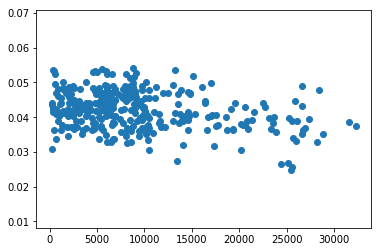

In [33]:
plt.scatter(cat['ngood'], cat['parallax'])

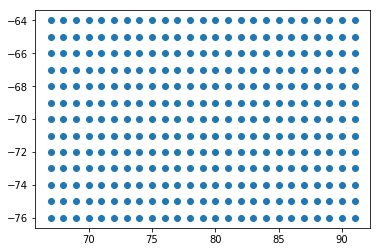

In [30]:
plt.scatter(cat['ra'], cat['dec'])

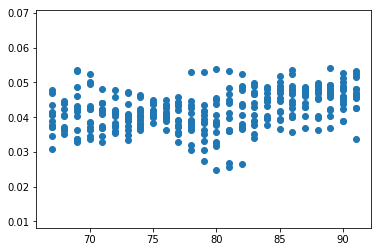

In [31]:
plt.scatter(cat['ra'], cat['parallax'])

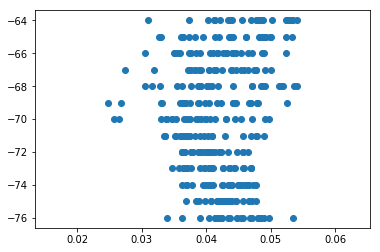

In [32]:
plt.scatter(cat['parallax'], cat['dec'])